<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Analyzing-Stock-Data-using-R-Quantmod/blob/main/Analyzing_Stock_Data_using_R_Quantmod_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pulling Data

In [21]:
install.packages('TTR');
install.packages('quantmod');
install.packages('PerformanceAnalytics');
install.packages('tseries');
install.packages('Quandl');

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
library(tidyverse)
library(TTR)
library(quantmod)
library(PerformanceAnalytics)
library(RColorBrewer)
library(tseries)
library(lubridate)
library(Quandl)

In [23]:
Quandl.api_key("zrcB2Ejv9UmvhPCUsy2_")

In [24]:
MSFT<-getSymbols("MSFT", auto.assign = F, from="1900-01-01")

## Analyzing data

In [25]:
head(MSFT)
tail(MSFT)

           MSFT.Open MSFT.High MSFT.Low MSFT.Close MSFT.Volume MSFT.Adjusted
1986-03-13  0.088542  0.101563 0.088542   0.097222  1031788800      0.060809
1986-03-14  0.097222  0.102431 0.097222   0.100694   308160000      0.062980
1986-03-17  0.100694  0.103299 0.100694   0.102431   133171200      0.064067
1986-03-18  0.102431  0.103299 0.098958   0.099826    67766400      0.062437
1986-03-19  0.099826  0.100694 0.097222   0.098090    47894400      0.061351
1986-03-20  0.098090  0.098090 0.094618   0.095486    58435200      0.059723

           MSFT.Open MSFT.High MSFT.Low MSFT.Close MSFT.Volume MSFT.Adjusted
2023-02-03    259.54    264.20   257.10     258.35    29062300        258.35
2023-02-06    257.44    258.30   254.78     256.77    22518000        256.77
2023-02-07    260.53    268.77   260.08     267.56    50841400        267.56
2023-02-08    273.20    276.76   266.21     266.73    54686000        266.73
2023-02-09    273.80    273.98   262.80     263.62    42375100        263.62
2023-02-10    261.53    264.09   260.66     263.10    25760900        263.10

In [26]:
dim(MSFT)

[1] 9305    6

In [27]:
range(index(MSFT))

[1] "1986-03-13" "2023-02-10"

In [28]:
MSFT[dim(MSFT)[1],]

           MSFT.Open MSFT.High MSFT.Low MSFT.Close MSFT.Volume MSFT.Adjusted
2023-02-10    261.53    264.09   260.66      263.1    25760900         263.1

In [29]:
str(MSFT)

An ‘xts’ object on 1986-03-13/2023-02-10 containing:
  Data: num [1:9305, 1:6] 0.0885 0.0972 0.1007 0.1024 0.0998 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "MSFT.Open" "MSFT.High" "MSFT.Low" "MSFT.Close" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2023-02-11 14:58:15"


In [30]:
class(MSFT)   #xts object is for extensible time series

[1] "xts" "zoo"

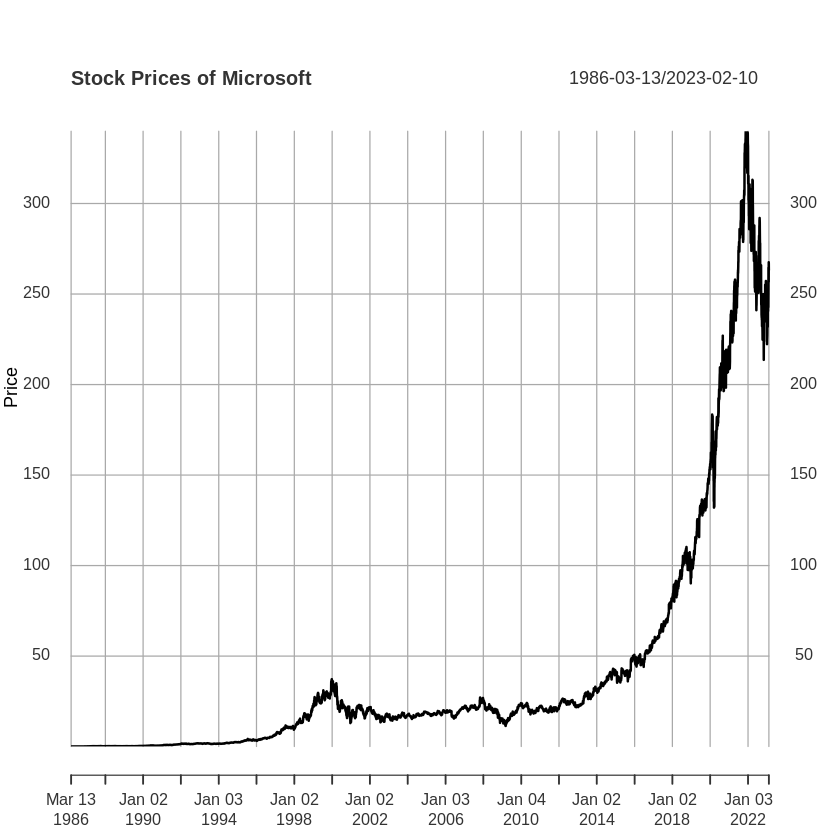

In [31]:
plot(MSFT$MSFT.Adjusted, main = 'Stock Prices of Microsoft', ylab = 'Price')

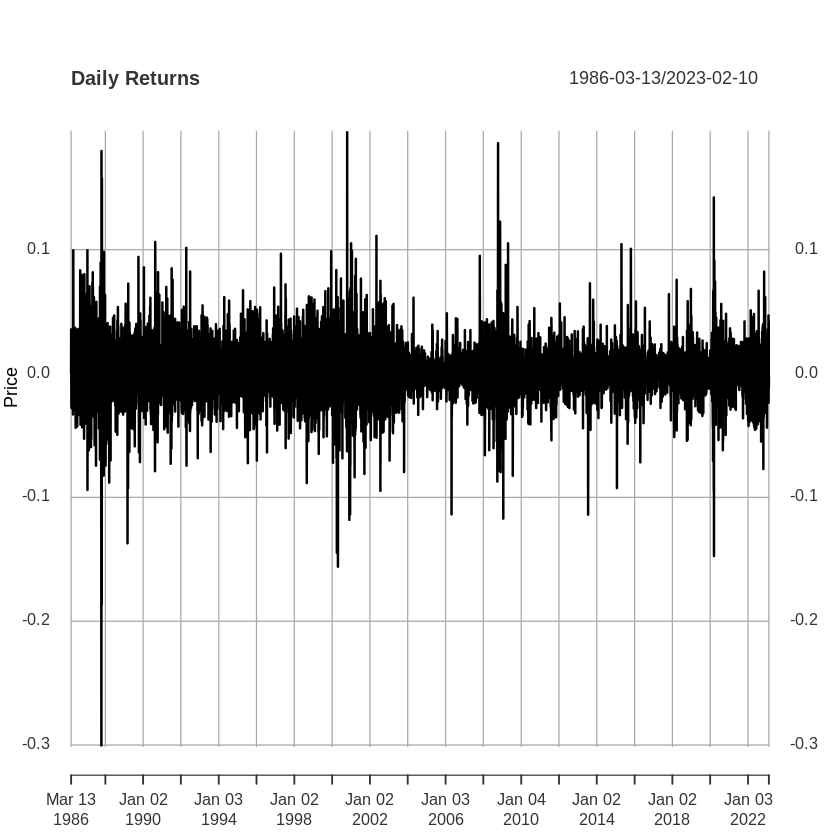

In [32]:
plot(dailyReturn(MSFT$MSFT.Adjusted), main = 'Daily Returns', ylab = 'Price')

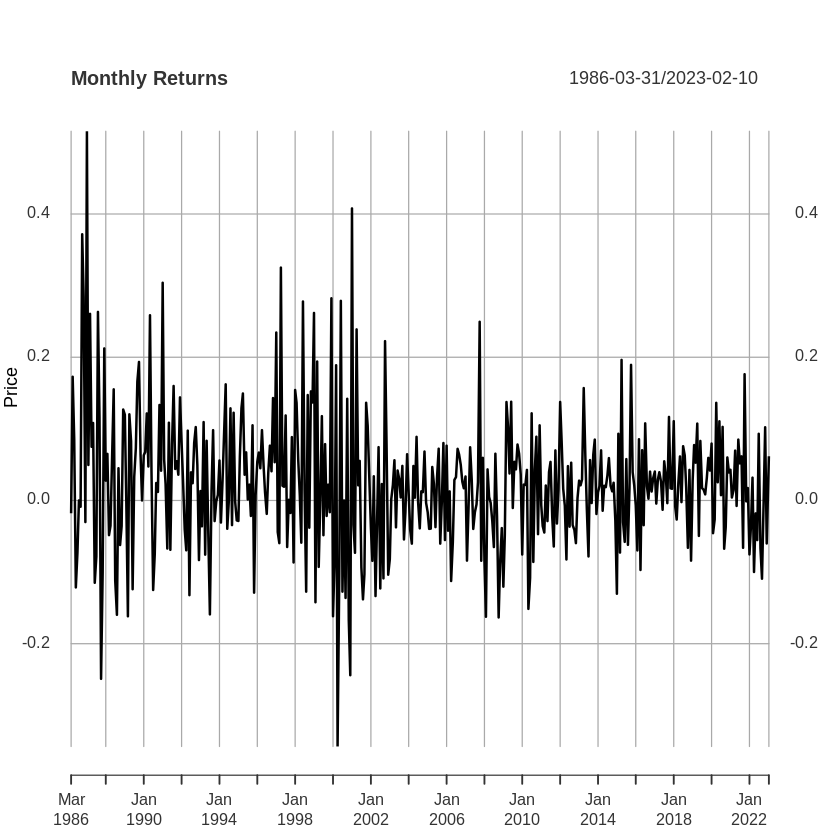

In [33]:
plot(monthlyReturn(MSFT$MSFT.Adjusted), main = 'Monthly Returns', ylab = 'Price')

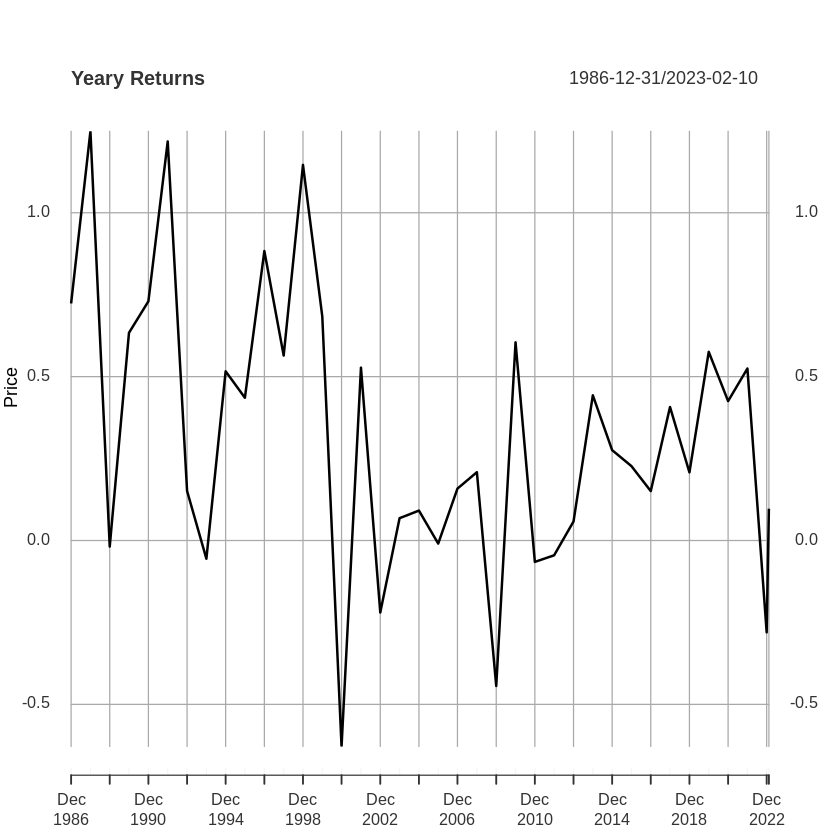

In [34]:
plot(yearlyReturn(MSFT$MSFT.Adjusted), main = 'Yeary Returns', ylab = 'Price')

In [35]:
# df <- as.data.frame(MSFT)
# class(df)
# head(df)
# df <- as.xts(df)
# class(df)

# write.csv(df, "newdatamsft.csv")

## Pulling Tesla's data

In [36]:
tsla <- getSymbols("TSLA", auto.assign = F)
head(tsla)

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2010-06-29  1.266667  1.666667 1.169333   1.592667   281494500      1.592667
2010-06-30  1.719333  2.028000 1.553333   1.588667   257806500      1.588667
2010-07-01  1.666667  1.728000 1.351333   1.464000   123282000      1.464000
2010-07-02  1.533333  1.540000 1.247333   1.280000    77097000      1.280000
2010-07-06  1.333333  1.333333 1.055333   1.074000   103003500      1.074000
2010-07-07  1.093333  1.108667 0.998667   1.053333   103825500      1.053333

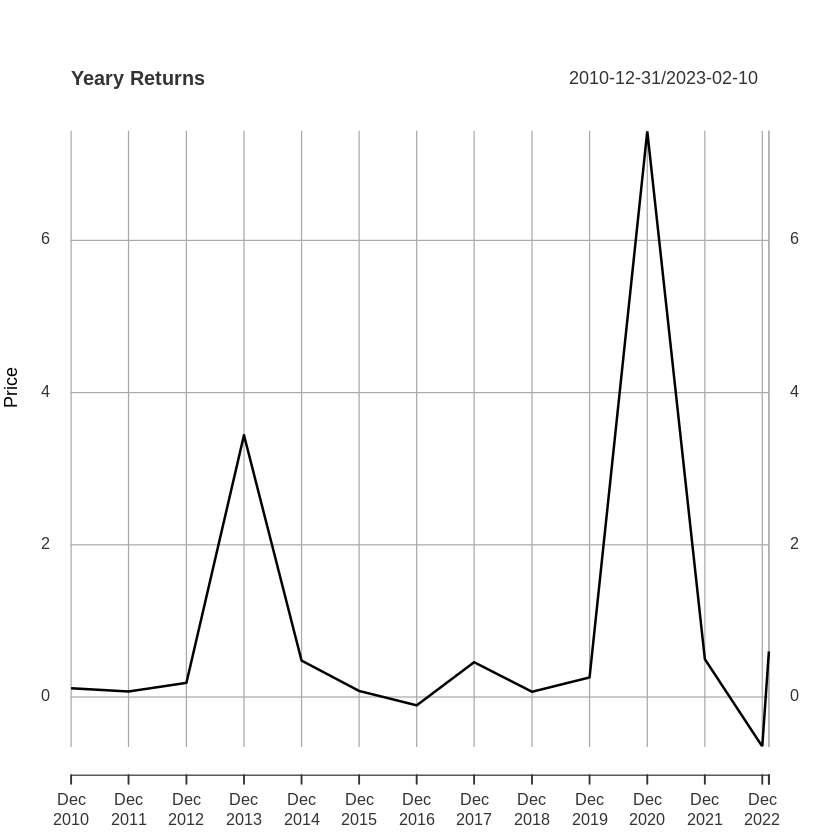

In [37]:
plot(yearlyReturn(tsla$TSLA.Adjusted), main = 'Yeary Returns', ylab = 'Price')

## Comparing Multiple Stocks

In [46]:
# MSFT<-getSymbols("MSFT", auto.assign = F, from="1900-01-01")
# MSFT_Ad <- Ad(MSFT)
# head(MSFT_Ad)
# MSFT_daily = dailyReturn(MSFT_Ad)
# head(MSFT_daily)

MSFT.new = dailyReturn(Ad(getSymbols("MSFT", auto.assign = F, from = "1900-01-01")))
head(MSFT.new)

           daily.returns
1986-03-13    0.00000000
1986-03-14    0.03570195
1986-03-17    0.01725945
1986-03-18   -0.02544212
1986-03-19   -0.01739353
1986-03-20   -0.02653583

In [47]:
FB.new = dailyReturn(Ad(getSymbols("META", auto.assign = F, from = "1900-01-01")))
dim(FB.new)
head(FB.new)

[1] 2701    1

           daily.returns
2012-05-18    0.00000000
2012-05-21   -0.10986139
2012-05-22   -0.08903906
2012-05-23    0.03225806
2012-05-24    0.03218747
2012-05-25   -0.03390854

In [60]:
comb_trade <- merge(MSFT.new, FB.new, all = F)
colnames(comb_trade) <- c("MSFT", "FB")
head(comb_trade)

                    MSFT          FB
2012-05-18 -0.0151412690  0.00000000
2012-05-21  0.0163991567 -0.10986139
2012-05-22  0.0003360643 -0.08903906
2012-05-23 -0.0218411859  0.03225806
2012-05-24 -0.0013744456  0.03218747
2012-05-25 -0.0003439679 -0.03390854

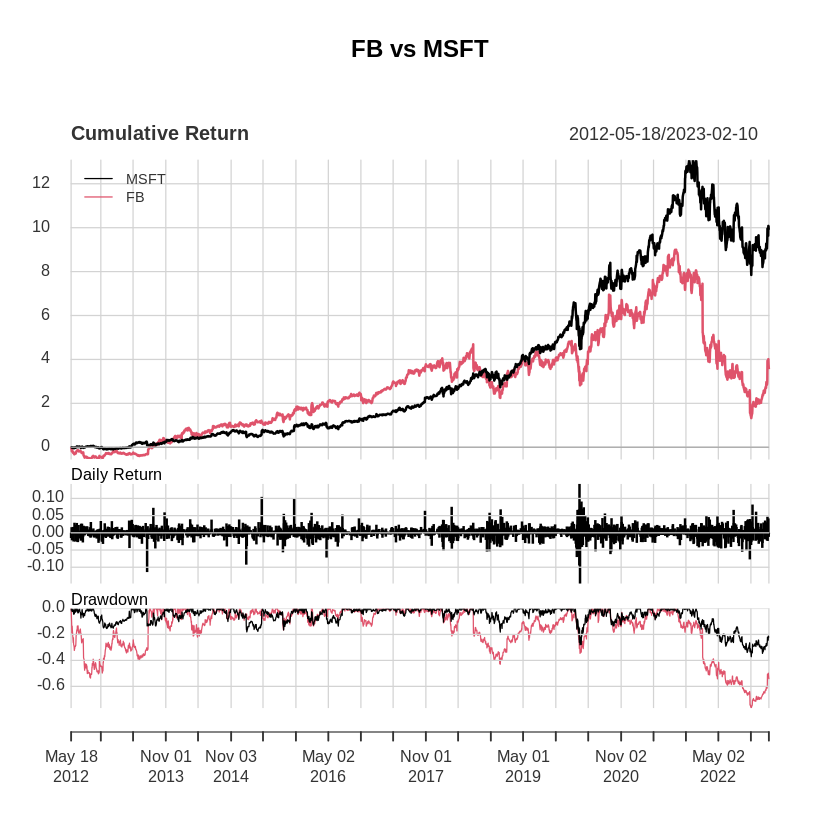

In [61]:
charts.PerformanceSummary(comb_trade, main = "FB vs MSFT")

In [62]:
table.AnnualizedReturns(comb_trade)

,MSFT,FB
,<dbl>,<dbl>
Annualized Return,0.2496,0.1520
Annualized Std Dev,0.2682,0.4070
Annualized Sharpe (Rf=0%),0.9308,0.3734
